## SUPERSTORE MARKETING PROJECT by KOSSY AJULUCHUKWU

![](storeimage.jpeg)

## CONTEXT

A SuperStore located in the SubUrban area in the US is planning on improving their revenue for their year end sales. The Marketing Department introduced a promo campaign which provide a 30% discount on all purchases. Cost has been set aside for the marketing team to engage existing customer via Telephone calls to sell the promo discount offer. However this cost need to be managed, hence the Marketing Manager wants you to build a model that can predict customers that will respond positively to the discount offer so that further engagement can be made to those specific customers to close the sales. This will help reduce the time and cost of scouring and engaging all the customers in the company's database for sales lead.

## OBJECTIVE

In this notebook, We will be building a model to predict the likelihood of a customer responding positively and purchasing the Gold membership discount offer, also identifying the different factors which affect the customer's response. This prediction will enable the Superstore Marketing team to save cost and time on telephone engagement to the right set of customers.

####  Dataset description
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

YearBirth - Age of the customer 

Complain - 1 if the customer complained in the last 2 years 

DtCustomer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website


NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

## FRAMEWORK

We will be using PACE framework to work on this project. This is a framework by GOOGLE for data alalysis projects.

**P** - Plan Stage

**A** - Anayze Stage

**C** - Construct Stage

**E** - Execute Stage

## 1.  PLAN STAGE

1. what is the goal of the project?
2. what is the source of dataset?
3. are there ethical considerations?

* Remove duplicates
* Address missing data
* Remove outliers


1.  We will be building a model to predict the likelihood of a customer to giving a positive response to purchase the Gold membership discount offer and also to identify the different factors which affect the customer's response. This prediction will enable the Superstore Marketing campaign to save cost and time on telephone engagement to the right set of customers.

2. The data set is a Superstore Marketing campaign dataset dowloaded from Kaggle. This data set can be gotten from this link https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset?select=superstore_data.csv

3. No ethical challenges as all dataset are evenly represented across range of variables. e.g Marital status, sex etc.

In [1196]:
#import the modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#import the sklearn models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

#import metrics and experimental modules
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import  roc_auc_score,confusion_matrix, classification_report, plot_roc_curve,\
plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

import warnings

warnings.filterwarnings("ignore")

In [1197]:
#read csv file
data = pd.read_csv("superstore_data.csv")
data

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [1198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1199]:
#dataset description
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [1200]:
data.shape

(2240, 22)

In [1201]:
#check for duplicates
data.duplicated().sum()

0

In [1202]:
#chack for missing data
data.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

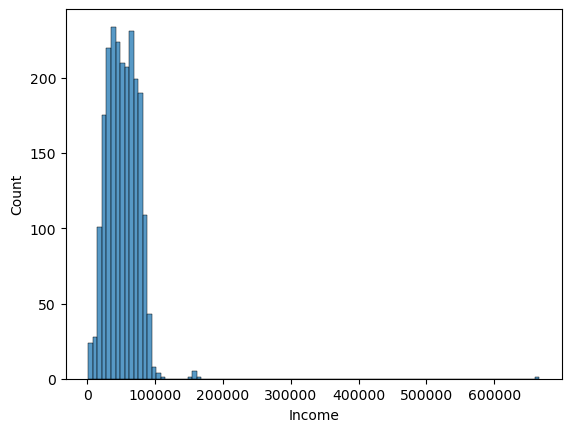

In [1203]:
sns.histplot(data['Income'], bins= 100)

In [1204]:
#lets replace the missing income data with the median since the income distribution is right skewed.
data['Income'] = data['Income'].fillna(data['Income'].median())

In [ ]:
#this csan also be useed to replace missing data in the dataframe with mean, median etc.
from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# data_imputed = imputer.fit_transform(data)
# The result is a NumPy array with missing values replaced by the median
# If you want to convert it back to a DataFrame, you can do:
# data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

In [1205]:
data.Income.isna().sum()

0

In [1206]:
#rename columns
data.rename(columns={'Year_Birth': 'Age', 'Dt_Customer': 'Enrollment_Date'}, inplace=True)

In [1208]:
#transform Age column to real Age
data['Age']= 2014 - data['Age']
data['Age'][:3]

0    44
1    53
2    56
Name: Age, dtype: int64

## 2.  ANALYZE STAGE

- Feature engineering
- EDA
- Discover insights and relationships


Income level category sourced from the US census bureau for household income
link: https://www.thebalancemoney.com/definition-of-middle-class-income-4126870

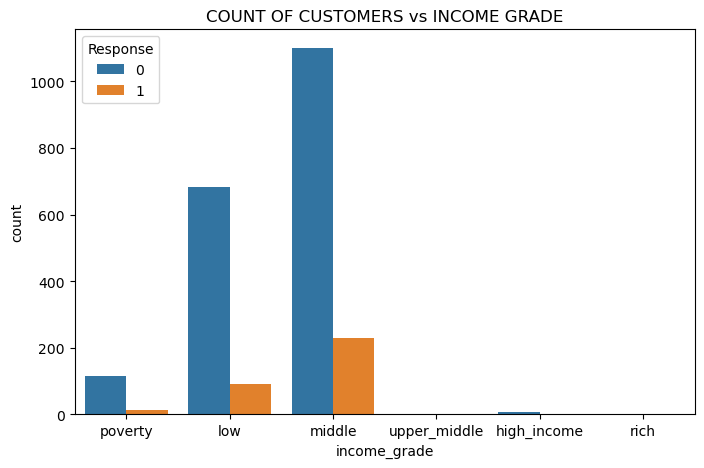

In [1114]:
#create new column for income class

plt.figure(figsize=(8, 5))

income_amount = [0, 20000, 45000,  140000, 150000, 200000, 600000]
income_title = ['poverty',"low", 'middle' , 'upper_middle', 'high_income','rich' ]

data["income_grade"] = pd.cut(data.Income, bins = income_amount, labels= income_title)

sns.countplot(data = data, x= data["income_grade"], hue = "Response")
plt.title("COUNT OF CUSTOMERS vs INCOME GRADE");

- More Customers in the middle class for income grade responded positively to the campaign. The company should focus on customers between the low and middle class categories

In [582]:
#
data[data.Income >=200000] #this is an outlier, this will be removed before training the dataset

,Id,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Date,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_grade
527,9432,37,Graduation,Together,666666.0,1,0,2/6/2013,23,9,...,1,12,4,3,1,3,6,0,0,NaN


In [1115]:
#detect outlier
data.Age.describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

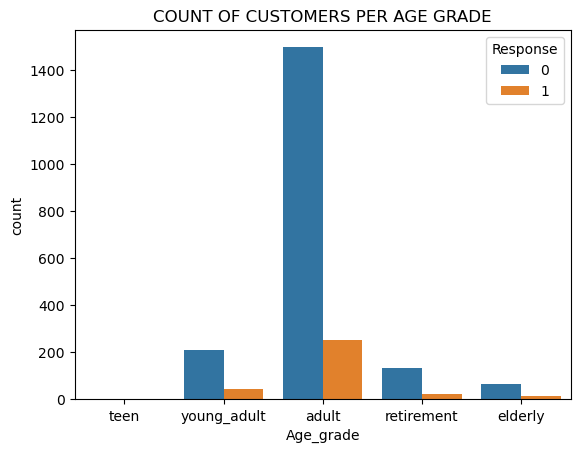

In [1116]:
#create a new age category using the age range

age_number = [12, 18, 30, 61, 65, 120]
age_level = ['teen', 'young_adult','adult','retirement','elderly']
data["Age_grade"] = pd.cut(data.Age, bins = age_number, labels= age_level)
sns.countplot(data= data, x= data['Age_grade'], hue = 'Response')
plt.title("COUNT OF CUSTOMERS PER AGE GRADE");

- Customers in the Adult category(30 -61 yrs) responded well to the promo campaign than other categories

In [1209]:
# create a new colunm showing if a customer has children or not.
data['HaveChildren']= data['Kidhome'] + data['Teenhome']

data['HaveChildren']= np.where(data["HaveChildren"]> 0, 1, 0)

In [1118]:
data.head()

,Id,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Date,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_grade,Age_grade,HaveChildren
0,1826,44,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,1,4,4,6,1,1,0,middle,adult,0
1,1,53,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,1,7,3,7,5,1,0,middle,adult,0
2,10476,56,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,1,3,2,5,2,0,0,middle,adult,1
3,1386,47,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,1,0,2,7,0,0,low,adult,1
4,5371,25,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,2,3,1,2,7,1,0,low,young_adult,1


In [1119]:
#create copy of dataframe
df = data.copy()

In [1120]:
bill= df.Response.value_counts()
bill

0    1906
1     334
Name: Response, dtype: int64

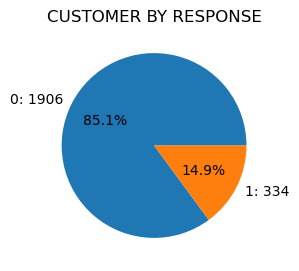

In [1121]:
plt.figure(figsize=(3,3))
plt.pie(x= bill, labels =[f'{bill.index[0]}: {bill.values[0]}',
                          f'{bill.index[1]}: {bill.values[1]}'],
                          autopct='%1.1f%%')
plt.title('CUSTOMER BY RESPONSE');

**This is an imbalanced dataset, prior to model training we would address this imbalance to improve performance**

In [1122]:
df['Enrollment_Date']= pd.to_datetime(df.Enrollment_Date)

In [1123]:
df['Month']= df.Enrollment_Date.dt.strftime("%b %Y")
df['Year']= df.Enrollment_Date.dt.year
df

,Id,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Date,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_grade,Age_grade,HaveChildren,Month,Year
0,1826,44,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,middle,adult,0,Jun 2014,2014
1,1,53,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,middle,adult,0,Jun 2014,2014
2,10476,56,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,5,2,0,0,middle,adult,1,May 2014,2014
3,1386,47,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,2,7,0,0,low,adult,1,Nov 2014,2014
4,5371,25,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,low,young_adult,1,Aug 2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,38,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,2,11,4,0,0,middle,adult,1,Jul 2013,2013
2236,5263,37,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,3,8,0,0,low,adult,1,Jan 2013,2013
2237,22,38,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1,5,8,0,0,middle,adult,1,Mar 2012,2012
2238,528,36,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,4,10,3,0,0,middle,adult,0,Nov 2012,2012


Text(0.5, 1.0, 'Number of enrollment per year')

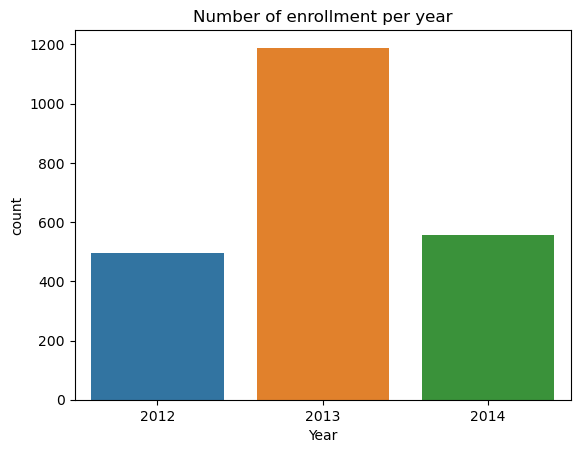

In [1124]:
sns.countplot(data= df, x= df.Year)
plt.title('Number of enrollment per year')

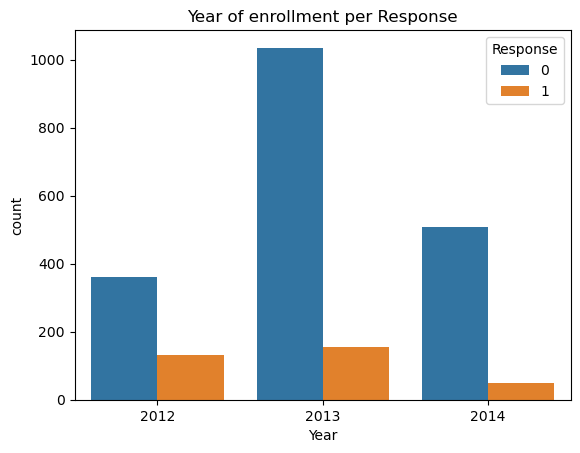

In [1125]:
sns.countplot(data= df, x= df.Year, hue = "Response")
plt.title('Year of enrollment per Response');

We had more positive responses in the year 2012 and 2013. The company have to verify why year 2014 had low response count despite having approximately the number of enrollment in 2012

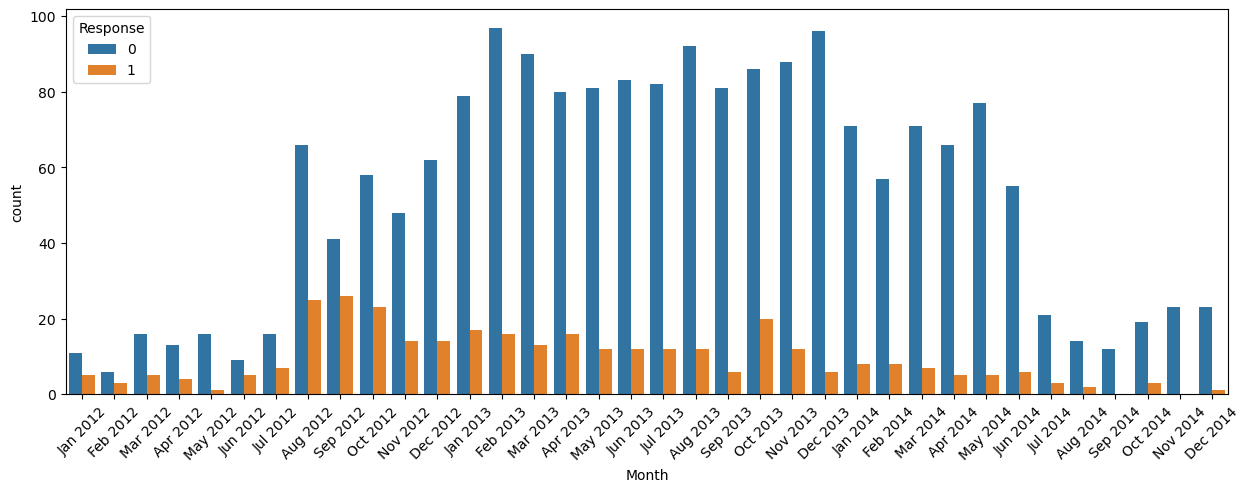

In [594]:
plt.figure(figsize=(15, 5))
# Create a custom order for the 'Month' column
custom_order = pd.date_range(start='2012-01-01', end='2014-12-31', freq='M').strftime('%b %Y')

# Convert the 'Month' column to a Categorical data type with the custom order
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)

sns.countplot(x= 'Month', hue = 'Response', data = df)
plt.xticks(rotation = 45);

**The highest number of positive responses were reported in August 2012 and September 2012**

There is a unvaried decline from 2012 to 2014.
This proves that the number of customer enrolled in each month does not necessary affect the number of positive response.This means some custiomer might not be aware of the campaign.

In [1126]:
df.Month.isna().sum()

0

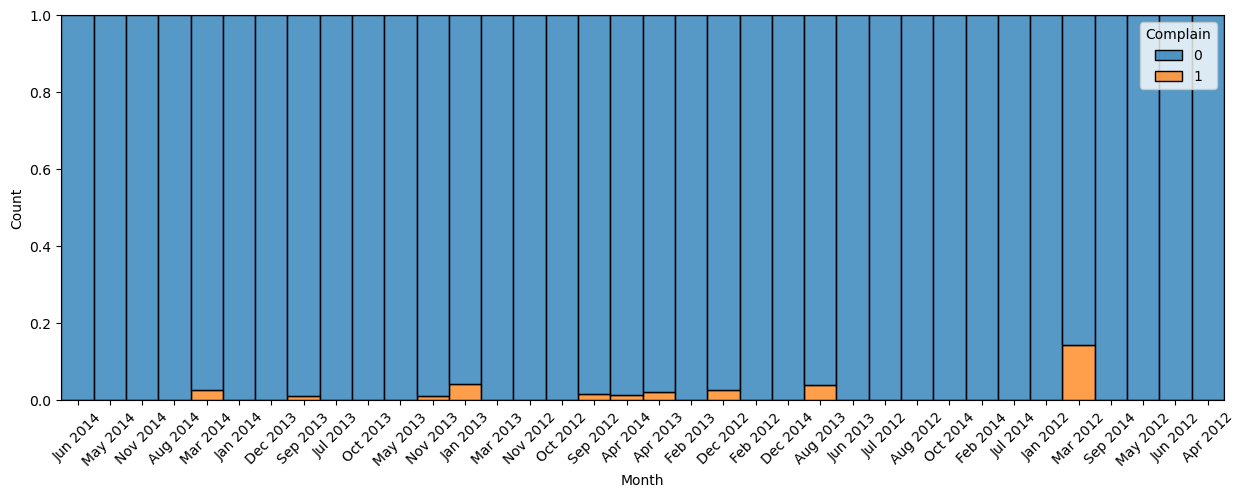

In [1128]:
plt.figure(figsize=(15, 5))
sns.histplot(x= 'Month', hue = 'Complain', multiple= 'fill', data = df)
plt.xticks(rotation = 45);

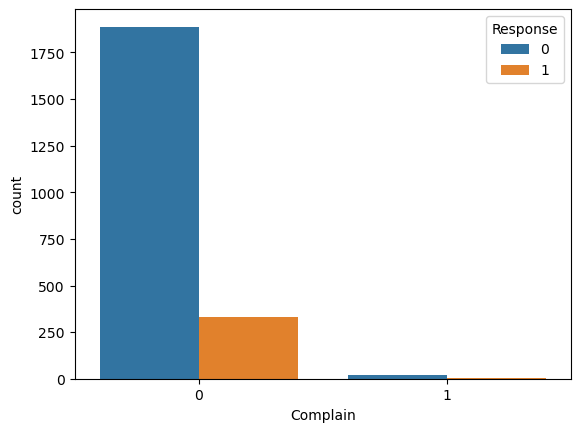

In [1129]:
sns.countplot(x="Complain", data = df, hue = 'Response');

- Those who didn't complain are more likely to respond well to the promo**

In [1151]:
df.Recency.mean()

49.109375

Text(0.5, 1.0, 'Number of Day since last purchase- Recency')

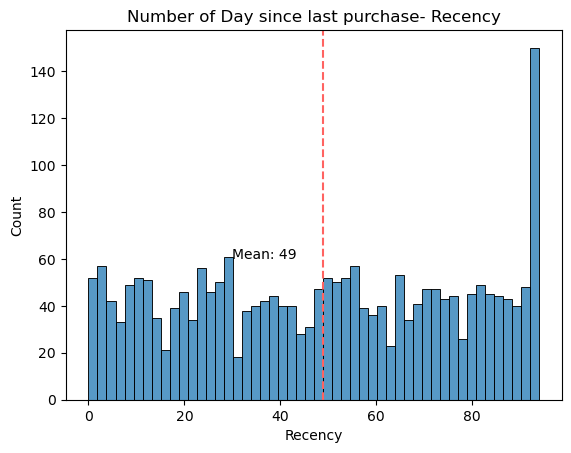

In [1218]:
sns.histplot(x= df['Recency'], bins=50)
plt.text(30, 60, f'Mean: 49')
plt.axvline(x=49, color='#ff6361', ls='--');
plt.title("Number of Day since last purchase- Recency")

<AxesSubplot:xlabel='Recency', ylabel='Count'>

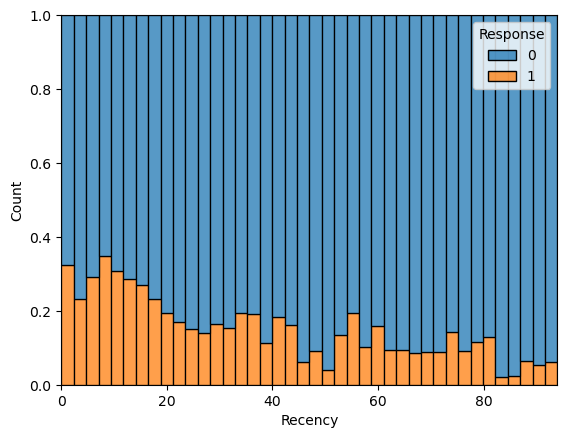

In [1221]:
sns.histplot(data = df, hue= 'Response', x= df.Recency, bins= 40, multiple='fill')

- it means that the average number of days since the customer's last purchase is 49 days which is more than a month. This is worrisome for the superstore as this could lead to customer churn. Lets check if it affected the number of store and web purchases.
- The higher the recency, the more likely for them to accept the offer.

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='count'>

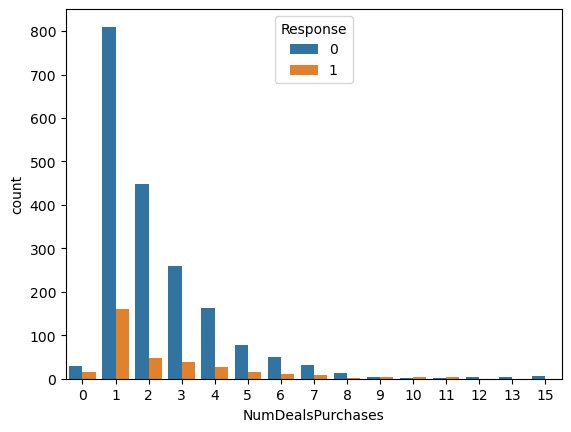

In [1162]:
sns.countplot(x= 'NumDealsPurchases', data=df, hue= 'Response')

- This proves that not all product has a discounted price. Those who spend less are more concerned abount discount. This should be made known to the Marketing manager

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='count'>

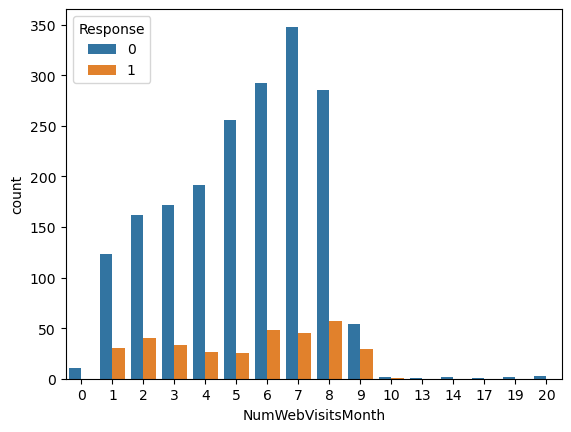

In [598]:
sns.countplot(data = df, x= 'NumWebVisitsMonth', hue = 'Response')

- This shows that customers visit the website at most 6 to 7 times every month, this is a good opportunity for the the company to amplify the promo adverts on their online to drive organic sales.

- customer who don't vist the website do not purchase the discount offer.

<AxesSubplot:xlabel='NumWebPurchases', ylabel='count'>

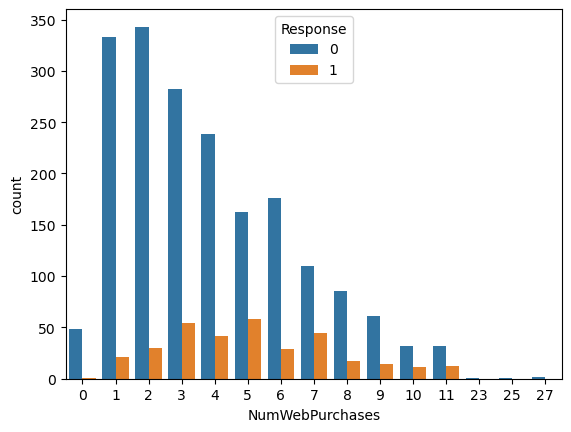

In [599]:
sns.countplot(data = df, x= 'NumWebPurchases', hue = 'Response')

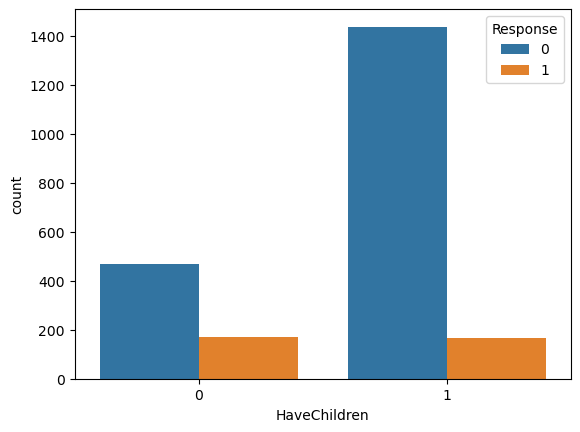

In [1195]:
sns.countplot(data=df, x=df.HaveChildren, hue= 'Response');

- Customers with or without children did not affect the purchase of the discount offer. The count of positive responses for both category is almost the same.

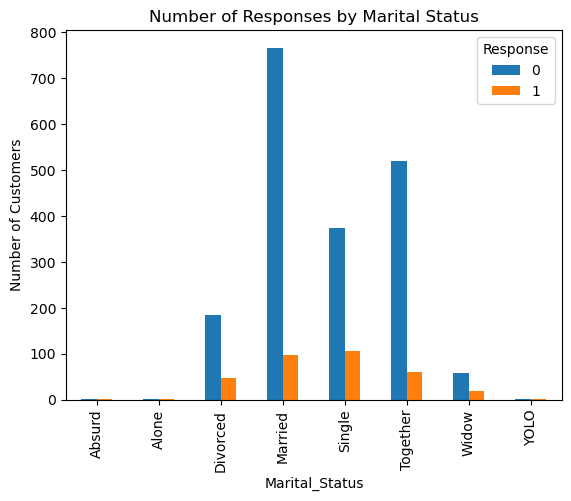

In [1171]:
#responses based on marital status
pd.crosstab(df.Marital_Status, df.Response).plot(kind= "bar")
plt.ylabel("Number of Customers")
plt.title('Number of Responses by Marital Status');

**Customers who are more Maried and Single, respond positively to the campaign. Hence the company should focus on these groups.**

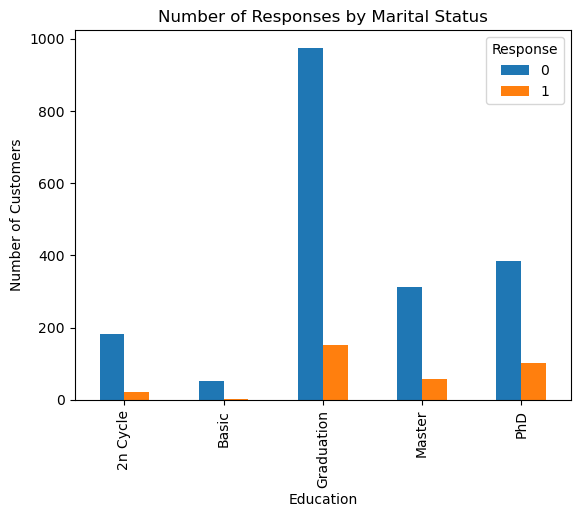

In [1172]:
#responses based on Education
pd.crosstab(df.Education, df.Response).plot(kind= "bar")
plt.ylabel("Number of Customers")
plt.title('Number of Responses by Marital Status');

- Customers who are more educated, responded positively to the campaign. Hence the company should focus on these groups.

In [602]:
df.corr()

,Id,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,HaveChildren,Year
Id,1.000000,-0.000028,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,0.033883,0.000493,-0.006414
Age,-0.000028,1.000000,0.160899,-0.230176,0.352111,0.019871,0.157773,0.017917,0.030872,0.041625,...,0.061818,0.060846,0.145040,0.121275,0.128272,-0.121139,-0.021325,0.030128,-0.011731,0.028188
Income,0.012996,0.160899,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,0.321938,-0.082315,0.380554,0.586826,0.526600,-0.549785,0.132867,-0.027187,-0.336691,0.022381
Kidhome,0.002406,-0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207,0.520772,0.053339
Teenhome,-0.002580,0.352111,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138,0.586831,-0.008260
Recency,-0.046524,0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231,0.000505,-0.026084
MntWines,-0.022878,0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007,-0.343869,-0.154188
MntFruits,0.004600,0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166,-0.413501,-0.055150
MntMeatProducts,-0.004437,0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483,-0.575128,-0.082472
MntFishProducts,-0.024475,0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953,-0.450877,-0.067611


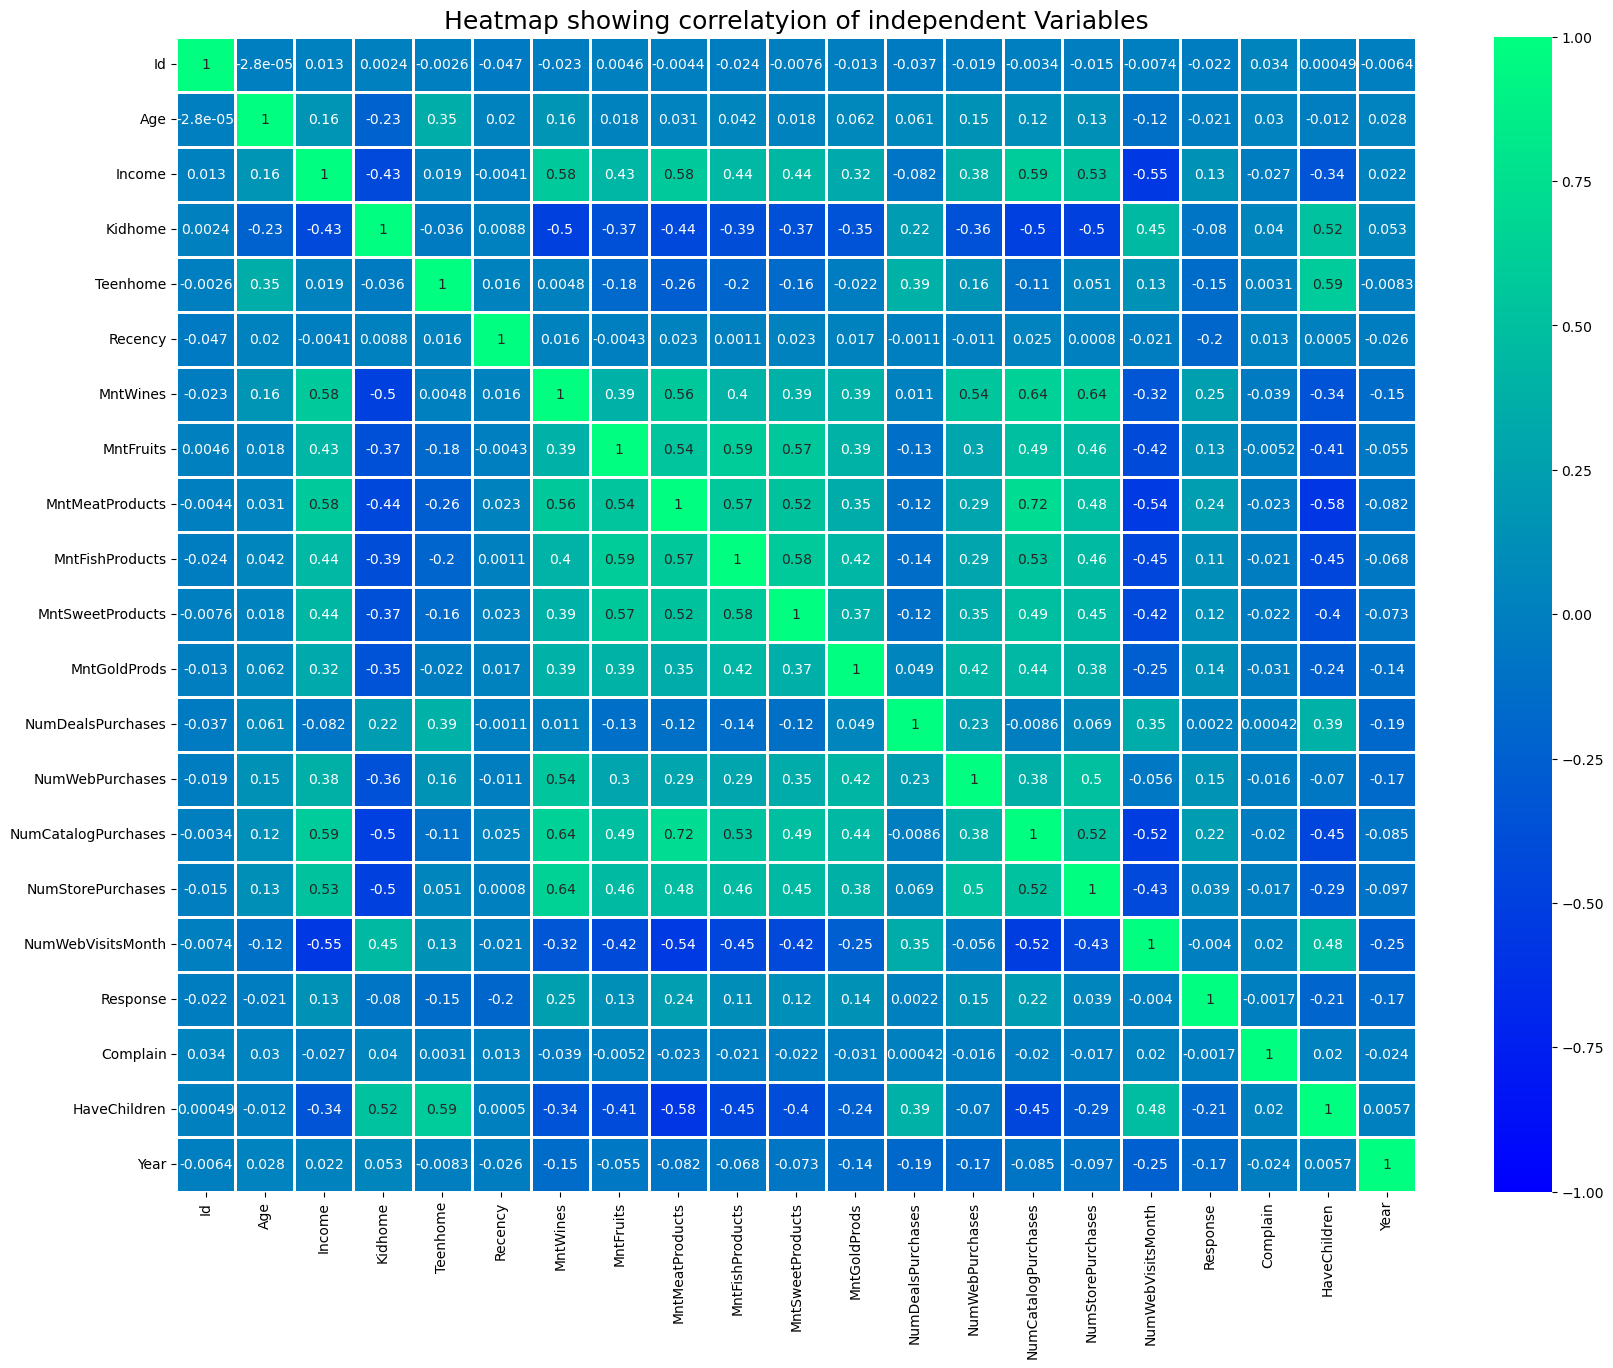

In [1173]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='winter', linewidths= 2)
plt.title("Heatmap showing correlatyion of independent Variables", fontsize= 18);

**While maintaining a pearson correaltional threshold of 0.7, There is no severe multicolinearity of the independent variable. However this threshold is arbitriary.**

In [1174]:
#drop colums
col_drop=['Id','Teenhome','Kidhome', 'Enrollment_Date']

df.drop(col_drop, axis= 1, inplace= True)

In [1175]:
df.head()

,Age,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_grade,Age_grade,HaveChildren,Month,Year
0,44,Graduation,Divorced,84835.0,0,189,104,379,111,189,...,4,6,1,1,0,middle,adult,0,Jun 2014,2014
1,53,Graduation,Single,57091.0,0,464,5,64,7,0,...,3,7,5,1,0,middle,adult,0,Jun 2014,2014
2,56,Graduation,Married,67267.0,0,134,11,59,15,2,...,2,5,2,0,0,middle,adult,1,May 2014,2014
3,47,Graduation,Together,32474.0,0,10,0,1,0,0,...,0,2,7,0,0,low,adult,1,Nov 2014,2014
4,25,Graduation,Single,21474.0,0,6,16,24,11,0,...,1,2,7,1,0,low,young_adult,1,Aug 2014,2014


In [1176]:
def remove_outlier(column_list, percentile):
    for col in column_list:
        threshold =df[col].quantile(percentile)
        df.loc[df[col] > threshold, col] = threshold
        print(f'The highest threshold for {col}: {threshold}')

In [1177]:
column_list = ['Age', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [1178]:
#remove all the outlier using threshold of 0.95
remove_outlier(column_list, 0.95)

The highest threshold for Age: 64.0
The highest threshold for Income: 83926.99999999994
The highest threshold for Recency: 94.0
The highest threshold for MntWines: 1000.0
The highest threshold for MntFruits: 123.0
The highest threshold for MntMeatProducts: 687.0999999999995
The highest threshold for MntFishProducts: 168.04999999999973
The highest threshold for MntSweetProducts: 126.0
The highest threshold for MntGoldProds: 165.04999999999973
The highest threshold for NumDealsPurchases: 6.0
The highest threshold for NumWebPurchases: 9.0
The highest threshold for NumCatalogPurchases: 9.0
The highest threshold for NumStorePurchases: 12.0
The highest threshold for NumWebVisitsMonth: 8.0


In [1181]:
# tableau_data = df.to_csv("mytableau.csv")

In [1180]:
df.describe()

,Age,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,HaveChildren,Year
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,44.974554,51471.329911,48.974554,295.283482,24.774107,158.981786,35.659196,25.435268,42.151161,2.215625,3.996875,2.592411,5.753125,5.239286,0.149107,0.009375,0.715179,2013.028125
std,11.441592,20149.636883,28.743957,314.215631,34.857790,198.671350,48.913800,35.999396,46.286135,1.538671,2.501895,2.653663,3.173309,2.246107,0.356274,0.096391,0.451430,0.684554
min,18.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
25%,37.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,2013.000000
50%,44.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,2013.000000
75%,55.000000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1.000000,2013.000000
max,64.000000,83927.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,126.000000,165.050000,6.000000,9.000000,9.000000,12.000000,8.000000,1.000000,1.000000,1.000000,2014.000000


## convert categorical data to Numerical data

In [1182]:
#create an instance of LabelEncoder for each Catergory Column
label_Education= LabelEncoder()
label_Marital_Status= LabelEncoder()
label_income_grade= LabelEncoder()
label_Age_grade = LabelEncoder()

#fit the encoder
df.Education = label_Education.fit_transform(df.Education)
df.Marital_Status = label_Marital_Status.fit_transform(df["Marital_Status"])
df.Age_grade = label_Age_grade.fit_transform(df.Age_grade)
df.income_grade = label_income_grade.fit_transform(df.income_grade)

In [1183]:
df0 = df.copy()
df0

,Age,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_grade,Age_grade,HaveChildren,Month,Year
0,44,2,2,83927.0,0,189,104,379.0,111.00,126,...,4,6,1,1,0,2,0,0,Jun 2014,2014
1,53,2,4,57091.0,0,464,5,64.0,7.00,0,...,3,7,5,1,0,2,0,0,Jun 2014,2014
2,56,2,3,67267.0,0,134,11,59.0,15.00,2,...,2,5,2,0,0,2,0,1,May 2014,2014
3,47,2,5,32474.0,0,10,0,1.0,0.00,0,...,0,2,7,0,0,1,0,1,Nov 2014,2014
4,25,2,4,21474.0,0,6,16,24.0,11.00,0,...,1,2,7,1,0,1,4,1,Aug 2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,38,4,2,66476.0,94,372,18,126.0,47.00,48,...,2,11,4,0,0,2,0,1,Jul 2013,2013
2236,37,0,3,31056.0,94,5,10,13.0,3.00,8,...,0,3,8,0,0,1,0,1,Jan 2013,2013
2237,38,2,2,46310.0,94,185,2,88.0,15.00,5,...,1,5,8,0,0,2,0,1,Mar 2012,2012
2238,36,2,3,65819.0,94,267,38,687.1,149.00,126,...,4,10,3,0,0,2,0,0,Nov 2012,2012


In [1184]:
df0.drop("Month", axis = 1, inplace= True)

In [1185]:
#split our dataset into y and X
y= df0['Response']
X= df0.drop("Response", axis =1)

In [1186]:
y.shape, X.shape

((2240,), (2240, 21))

In [1187]:
#standardize the values
scale = StandardScaler()
X_scale = scale.fit_transform(X)

## 3. CONSTRUCT STAGE

- model selection
- build model
- hyprparameter tuning to improve performance of model

In [1188]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify= y, test_size=0.2, random_state=42)

In [1189]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1792, 21), (1792,), (448, 21), (448,))

In [1190]:
def first_model(model, X_train, y_train, X_test, y_test):
    model.fit( X_train, y_train)
    pred = model.predict(X_test)
    model_score = accuracy_score(y_test, pred)
    return model_score

In [1191]:
model_list = {"lr": LogisticRegression(),
             "rf": RandomForestClassifier(),
             "Ab": AdaBoostClassifier(),
             "Gb": GradientBoostingClassifier(),
             }

In [1192]:
for model in model_list.values():
    score=first_model(model, X_train, y_train, X_test, y_test)
    print(f'Score for {model} is  {round(score, 2)}')

Score for LogisticRegression() is  0.88
Score for RandomForestClassifier() is  0.86
Score for AdaBoostClassifier() is  0.86
Score for GradientBoostingClassifier() is  0.87


## HYPER-PARAMETER TUNING

Since we have better score for Logistic Regression, we will focus on improving it.

## Logistic Regression GridSearch Hyperparameter tuning

In [1193]:
lr = LogisticRegression(random_state=42)

lr_param= {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': np.arange(10, 100, 10)
    }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

lr_gs = GridSearchCV(rf, param_grid=rf_param, scoring= scoring, cv=4, refit= 'f1')


In [1194]:
%%time
lr_gs.fit(X_train, y_train)

CPU times: user 8min 40s, sys: 2.18 s, total: 8min 42s
Wall time: 24min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [843]:
lr_gs.best_score_ #best F1 score

0.9517305577768893

## BALANCE THE DATASET FROM TRAINING DATASET
This will imporve performance

This is a poor score for F1, this can be attributed to the imbalanced dataset. We will use try and balance the minority class with the majority class using the `RandomOversampling`to improve our model performance.

In [855]:
#split our dataset into y and X
y= df0['Response']
X= df0.drop("Response", axis =1)

In [856]:
#split test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify= y, test_size=0.3, random_state=42)

In [857]:
#split validation dataset
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, stratify= y_train, test_size=0.3,random_state= 42)

In [858]:
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')

X_sampl, y_sampl = ros.fit_resample(X_train, y_train)

In [859]:
X_sampl.shape, y_sampl.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((1866, 21), (1866,), (672, 21), (672,), (471, 21), (471,))

In [860]:
%%time
lr_gs.fit(X_sampl, y_sampl)

CPU times: user 8min 2s, sys: 1.35 s, total: 8min 3s
Wall time: 8min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [861]:
y_sampl.value_counts(normalize = True)

0    0.5
1    0.5
Name: Response, dtype: float64

In [862]:
lr_gs.best_score_

0.9517305577768893

In [863]:
cv_results = pd.DataFrame(lr_gs.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.513576,0.010949,0.035942,0.000442,3,1.0,0.7,1,2,300,...,0.854033,0.013401,82,0.705263,0.720339,0.748175,0.71875,0.723132,0.015600,100
1,0.841489,0.007475,0.058366,0.000568,3,1.0,0.7,1,2,500,...,0.855441,0.013183,73,0.705263,0.735931,0.750000,0.72069,0.727971,0.016713,82
2,0.508449,0.001417,0.036043,0.000135,3,1.0,0.7,1,3,300,...,0.854033,0.013401,82,0.705263,0.720339,0.748175,0.71875,0.723132,0.015600,100
3,0.852890,0.007975,0.058955,0.001209,3,1.0,0.7,1,3,500,...,0.855441,0.013183,73,0.705263,0.735931,0.750000,0.72069,0.727971,0.016713,82
4,0.508729,0.001094,0.036002,0.000130,3,1.0,0.7,1,4,300,...,0.854033,0.013401,82,0.705263,0.720339,0.748175,0.71875,0.723132,0.015600,100


In [864]:
def check_score(model_name:str , model_object, metric:str ):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    #locate the value that has the maximum value for the metric
    evaluated = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    #filter out the metric at the maximum metric eveluated
    auc= evaluated.mean_test_roc_auc
    precision = evaluated.mean_test_precision
    recall = evaluated.mean_test_recall
    f1 = evaluated.mean_test_f1
    accuracy = evaluated.mean_test_accuracy
    
    #create a table to show the details of the metrics
    table =pd.DataFrame({"model": [model_name],
                         'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
        
    })
    return table

In [865]:
#this show the metric with the highest f1 score and it`s corresponding metric for the trained data

myresult= check_score("logisticRegressionCV", lr_gs, "f1")
myresult

,model,precision,recall,f1,accuracy,auc
0,logisticRegressionCV,0.913407,0.993562,0.951731,0.949624,0.992718


In [902]:
def get_score(model_object, X_test, y_test, model_name:str):
    
    y_pred= model_object.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc= roc_auc_score(y_test, y_pred)
    
    
    table= pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
    })
    
    return table

In [867]:
#Validation dataset
myresult2= get_score(lr_gs, X_val, y_val, 'LogisticRegressionVal')
myresult2

,model,precision,recall,f1,accuracy,auc
0,LogisticRegressionVal,0.44898,0.314286,0.369748,0.840764,0.623477


In [868]:
myresult = pd.concat([myresult, myresult2], axis = 0)
myresult

,model,precision,recall,f1,accuracy,auc
0,logisticRegressionCV,0.913407,0.993562,0.951731,0.949624,0.992718
0,LogisticRegressionVal,0.448980,0.314286,0.369748,0.840764,0.623477


In [869]:
#test dataset
myresult_test= get_score(lr_gs, X_test, y_test, 'LogisticRegressionTest')
myresult_test

,model,precision,recall,f1,accuracy,auc
0,LogisticRegressionTest,0.466667,0.42,0.442105,0.842262,0.668042


In [870]:
myresult_lr = pd.concat([myresult, myresult_test], axis = 0)
myresult_lr

,model,precision,recall,f1,accuracy,auc
0,logisticRegressionCV,0.913407,0.993562,0.951731,0.949624,0.992718
0,LogisticRegressionVal,0.448980,0.314286,0.369748,0.840764,0.623477
0,LogisticRegressionTest,0.466667,0.420000,0.442105,0.842262,0.668042


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       572
           1       0.47      0.42      0.44       100

    accuracy                           0.84       672
   macro avg       0.68      0.67      0.68       672
weighted avg       0.84      0.84      0.84       672



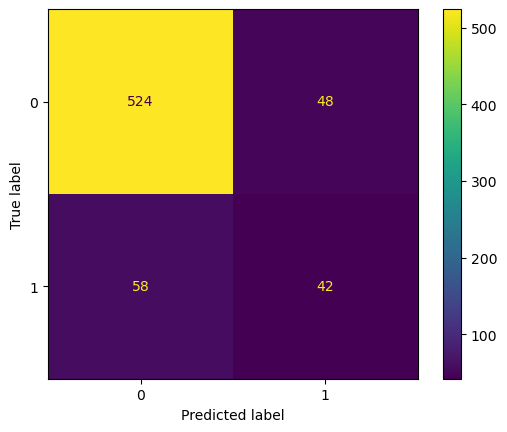

In [871]:

pred= lr_gs.predict(X_test)
plot_confusion_matrix(lr_gs, X_test, y_test)
print(classification_report(y_test, pred));

## 2. GradientBoost GridSearch

In [873]:
gb= GradientBoostingClassifier(random_state= 42)

param= {'learning_rate': [0.05, 0.01],
    'n_estimators': np.arange(10, 100, 20),
    'min_samples_split':[2, 4, 8],
    'min_samples_leaf':[1, 2, 3],
    'max_depth': [4, 6, None],
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

gb_cv= GridSearchCV(gb, param_grid= param, cv=4, scoring= scoring, refit= 'f1')

In [874]:
%%time

gb_cv.fit(X_sampl, y_sampl)

CPU times: user 4min 52s, sys: 883 ms, total: 4min 53s
Wall time: 4min 53s


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.01],
                         'max_depth': [4, 6, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': array([10, 30, 50, 70, 90])},
             refit='f1',
             scoring={'accuracy', 'recall', 'f1', 'roc_auc', 'precision'})

In [889]:
gb_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=None,
                           min_samples_leaf=3, min_samples_split=8,
                           n_estimators=90, random_state=42)

In [890]:
gb_cv.best_score_

0.9463037983457339

In [891]:
gb_result = check_score("GradientBoostCV", gb_cv, 'f1')
gb_result

,model,precision,recall,f1,accuracy,auc
0,GradientBoostCV,0.905129,0.991416,0.946304,0.943736,0.989913


In [892]:
gb_result2= get_score(gb_cv, X_val, y_val, 'GradientBoostVal')
gb_result2

,model,precision,recall,f1,accuracy,auc
0,GradientBoostVal,0.396825,0.357143,0.37594,0.823779,0.63119


In [893]:
gb_result = pd.concat([gb_result, gb_result2], axis= 0)
gb_result

,model,precision,recall,f1,accuracy,auc
0,GradientBoostCV,0.905129,0.991416,0.946304,0.943736,0.989913
0,GradientBoostVal,0.396825,0.357143,0.375940,0.823779,0.631190


In [894]:
gb_result3= get_score(gb_cv, X_test, y_test, 'GradientBoostTest')
gb_result3

,model,precision,recall,f1,accuracy,auc
0,GradientBoostTest,0.405063,0.32,0.357542,0.828869,0.618916


In [895]:
gb_result = pd.concat([gb_result, gb_result3], axis= 0)
gb_result

,model,precision,recall,f1,accuracy,auc
0,GradientBoostCV,0.905129,0.991416,0.946304,0.943736,0.989913
0,GradientBoostVal,0.396825,0.357143,0.375940,0.823779,0.631190
0,GradientBoostTest,0.405063,0.320000,0.357542,0.828869,0.618916


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       572
           1       0.41      0.32      0.36       100

    accuracy                           0.83       672
   macro avg       0.65      0.62      0.63       672
weighted avg       0.81      0.83      0.82       672



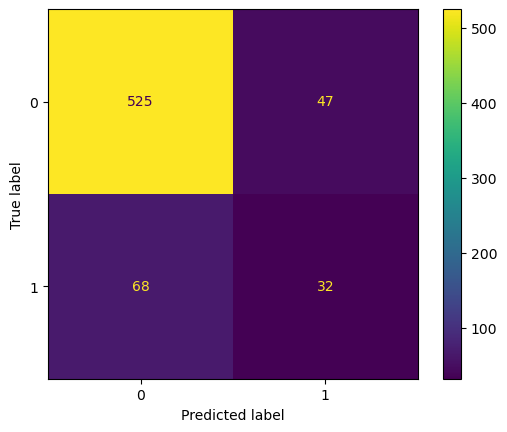

In [896]:
pred= gb_cv.predict(X_test)
plot_confusion_matrix(gb_cv, X_test, y_test)
print(classification_report(y_test, pred));

## CATBOOST MODEL
This model seem to be more robust.

In [1063]:
#lets try the catboost model

cat = CatBoostClassifier(learning_rate=0.05, iterations=100, random_seed=42)
cat.fit(X_sampl, y_sampl)

0:	learn: 0.6658668	total: 4.2ms	remaining: 416ms
1:	learn: 0.6448782	total: 6.6ms	remaining: 324ms
2:	learn: 0.6250668	total: 8.12ms	remaining: 263ms
3:	learn: 0.6002382	total: 9.38ms	remaining: 225ms
4:	learn: 0.5798017	total: 10.8ms	remaining: 205ms
5:	learn: 0.5646459	total: 12.8ms	remaining: 201ms
6:	learn: 0.5498636	total: 14.2ms	remaining: 189ms
7:	learn: 0.5353406	total: 15.4ms	remaining: 177ms
8:	learn: 0.5202980	total: 16.9ms	remaining: 170ms
9:	learn: 0.5093996	total: 18.3ms	remaining: 165ms
10:	learn: 0.5010162	total: 19.9ms	remaining: 161ms
11:	learn: 0.4884548	total: 21.2ms	remaining: 156ms
12:	learn: 0.4783180	total: 22.5ms	remaining: 151ms
13:	learn: 0.4701697	total: 23.7ms	remaining: 146ms
14:	learn: 0.4616118	total: 25ms	remaining: 142ms
15:	learn: 0.4546314	total: 26.6ms	remaining: 140ms
16:	learn: 0.4472681	total: 28.1ms	remaining: 137ms
17:	learn: 0.4387299	total: 29.4ms	remaining: 134ms
18:	learn: 0.4326032	total: 30.8ms	remaining: 131ms
19:	learn: 0.4265533	total

In [1047]:
cat_result = get_score(cat, X_val, y_val, 'CatboostVal')

cat_result

,model,precision,recall,f1,accuracy,auc
0,CatboostVal,0.486486,0.514286,0.5,0.847134,0.709761


In [1048]:
cat_result_Test = get_score(cat, X_test, y_test, 'CatboostTest')

cat_result_Test

,model,precision,recall,f1,accuracy,auc
0,CatboostTest,0.52381,0.66,0.584071,0.860119,0.777552


In [1049]:
pd.concat([cat_result, cat_result_Test], axis = 0)

,model,precision,recall,f1,accuracy,auc
0,CatboostVal,0.486486,0.514286,0.500000,0.847134,0.709761
0,CatboostTest,0.523810,0.660000,0.584071,0.860119,0.777552


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.52      0.66      0.58       100

    accuracy                           0.86       672
   macro avg       0.73      0.78      0.75       672
weighted avg       0.88      0.86      0.87       672



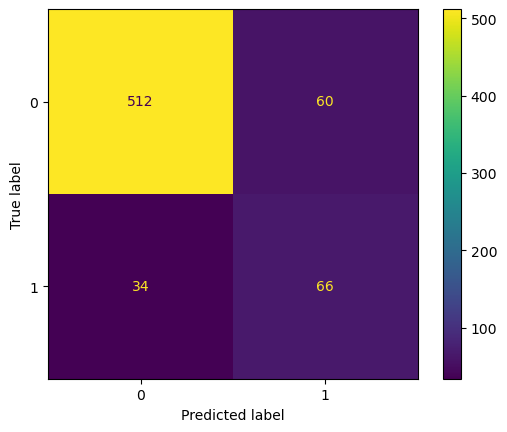

In [1050]:
pred= cat.predict(X_test)
plot_confusion_matrix(cat, X_test, y_test)
print(classification_report(y_test, pred));

## Catboosting Model Hyperparameter tuning

In [1051]:
cat = CatBoostClassifier(random_state=46)

cat_param= {
            'depth': [4,5,6,7,8,9, 10],
            'learning_rate': [0.01,0.02,0.03,0.04],
            'iterations': [10, 20,30,40,50,60,70,80,90, 100]
    }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

cat_gs = GridSearchCV(cat, param_grid=cat_param, scoring= scoring, cv=4, refit= 'recall')


In [1222]:
%%time
# cat_gs.fit(X_sampl, y_sampl)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 15 µs


In [1223]:
cat_gs.best_score_

0.9946397784380617

In [1054]:
check_score("CatBoostCV", cat_gs, 'recall')

,model,precision,recall,f1,accuracy,auc
0,CatBoostCV,0.896656,0.99464,0.943095,0.939982,0.990193


In [1055]:
get_score(cat_gs, X_test, y_test, 'CatBoostTest')

,model,precision,recall,f1,accuracy,auc
0,CatBoostTest,0.530435,0.61,0.567442,0.861607,0.757797


In [ ]:
PREDICT USING PROBABILITY 

**use predictProba to get probability of positive response, then set a threshold. This can held improve recall and f1 if there's no other way any model can help improve performance**

**The catboost model without hyperparameter tuning provided better recall score that when tuned**
- with this insight, we will be using the untuned catboost model to make our probability prediction.

In [1064]:

pred0= cat.predict_proba(X_test)
pred0[:10]

array([[0.76576658, 0.23423342],
       [0.53773846, 0.46226154],
       [0.98288581, 0.01711419],
       [0.72688312, 0.27311688],
       [0.68965901, 0.31034099],
       [0.93748119, 0.06251881],
       [0.99070982, 0.00929018],
       [0.7060679 , 0.2939321 ],
       [0.86188184, 0.13811816],
       [0.72091694, 0.27908306]])

In [1065]:
threshold = 0.35

#he second column represents the probability of the sample belonging to the positive class.
new_pred = pred0[:, 1]
new_pred= np.where(new_pred > threshold, 1, 0)

**Reason for using Threshold**

* By changing the threshold, you can influence the number of true positives (correctly predicted positive samples) and false positives (incorrectly predicted positive samples). Setting a higher threshold (closer to 1) typically increases precision but may lower recall, meaning the model becomes more conservative in making positive predictions. Conversely, setting a lower threshold (closer to 0) increases recall but may lower precision, resulting in more positive predictions.

* If your dataset has a severe class imbalance (a large difference in the number of samples between classes), setting a threshold directly at 0.5 might not be appropriate. You may need to adjust the threshold to reflect the class distribution better.

* Recall score should be prioriotize to catch more False Negative class as possible even if it leads to more flase positives. This requirement is crucial this addressses the likelihood of each customer positive response to the campaign.

In [1067]:
pred_table = pd.DataFrame({"new_pred": new_pred, "y_test": y_test})
pred_table

,new_pred,y_test
742,0,0
610,1,0
2072,0,0
1544,0,0
1209,0,1
...,...,...
1191,0,0
1457,0,0
712,1,1
176,1,0


In [1068]:
precision = precision_score(y_test, new_pred)
recall = recall_score(y_test, new_pred)
accuracy = accuracy_score(y_test, new_pred)
f1 = f1_score(y_test, new_pred)
auc= roc_auc_score(y_test, new_pred)
print(f'This  precision score is {precision}')
print(f'This recall score is {recall}')
print(f'This f1 score is {f1}')
print(f'This accouracy score is {accuracy}')


This  precision score is 0.4010152284263959
This recall score is 0.79
This f1 score is 0.531986531986532
This accouracy score is 0.7931547619047619


**Excellent! we got a better recall score, while balancing the f1 score as well.**

In [1069]:
confusion_matrix(y_test, new_pred)

array([[454, 118],
       [ 21,  79]])

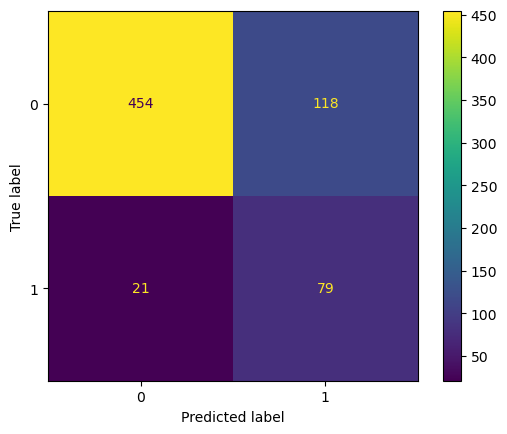

In [1070]:
cm = confusion_matrix(y_test, new_pred, labels=cat_gs.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=cat_gs.classes_)
disp.plot(values_format='');

In [1074]:
feature_importance = cat.get_feature_importance()

In [1078]:
X.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'income_grade', 'Age_grade', 'HaveChildren', 'Year'],
      dtype='object')

In [1225]:
feature_importance_df = pd.DataFrame({'Importance': feature_importance, "Features": X.columns})

feature_importance_df.sort_values(by= "Importance")

,Importance,Features
16,0.000000,Complain
18,0.951957,Age_grade
17,1.804528,income_grade
0,2.452401,Age
8,2.542243,MntFishProducts
9,2.578528,MntSweetProducts
12,2.872327,NumWebPurchases
2,2.902272,Marital_Status
6,2.961866,MntFruits
11,3.661589,NumDealsPurchases


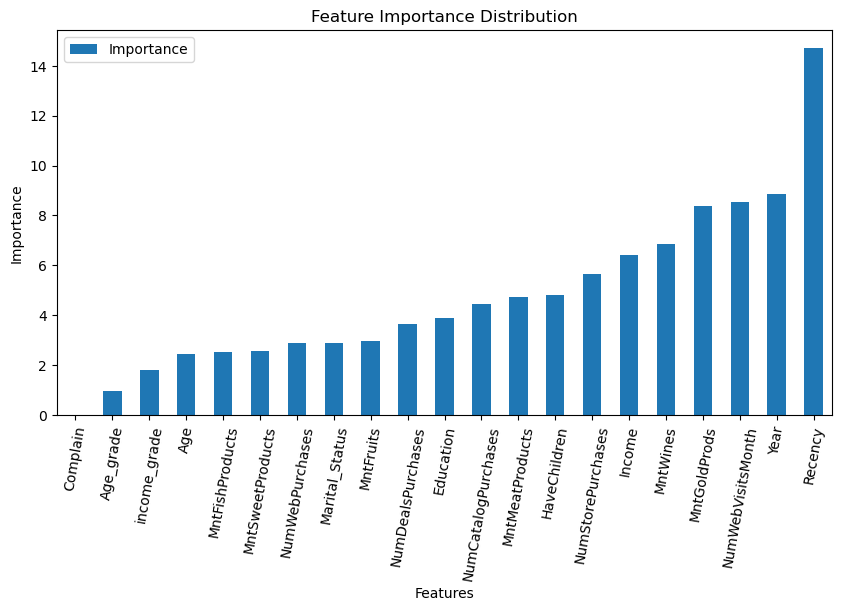

In [1098]:
feature_importance_df.sort_values(by= "Importance").plot(x= "Features", y= "Importance", 
                                                         kind='bar', 
                                                         figsize= (10, 5))
plt.title("Feature Importance Distribution")
plt.ylabel("Importance")
plt.xticks(rotation = 80);

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.



## SAVE MODEL
- The final model tunning using `predict_proba` gave us a better recall score, hence we will save the model and the prefered threshold. This threshold can be determined by the company depending on the risk level. Aside that, the catboost performed performed relatively well.

In [1071]:
import joblib

In [ ]:
# Save the model and threshold using joblib
model_filename = 'cat_model.joblib'
threshold_filename = 'threshold.joblib'

joblib.dump(cat, model_filename)
joblib.dump(threshold, threshold_filename)

In [ ]:
# Load the model and threshold
# loaded_model = joblib.load(model_filename)
# loaded_threshold = joblib.load(threshold_filename)

## 4. EXECUTION STAGE 

**GENERAL INSIGHT**

- Customers in the Adult category(30 -61 yrs) responded well to the promo campaign than other categories
- The lower the recency(days from last purchase), the more likely for them to accept the offer. Sales agent in the store should sell the promo to customers via word of mouth before the customer checks out.
- Bulk SMS and email addresses should be sent to these customers who recently made web purchases. 
- CatBoost model at a threshold of 0.35, produced a recall score of approximatley 80% with a F1 score of 53%, at this point we choose not to sacrifice the Precision score any further. Consequently, we will end up having more prospects in the True Positive class to engage.
- There was a downward trend in the number of new enrollment in 2014 wich conversely affected the number of discount offer purchase.
- The Middle class(Income) adults responded positively to the offer than other group.

**CONCERNS**
- Does registering for this promo campaign come at a cost?
- Are prices of neccessity goods high?

**RECOMMENDATION**
- The SuperStore can adopt the Catboost model, however, the threshold can be decided based on the campaign Manager's risk appettite towards customer's expected response. This will help the company manage their cost-to-benefit ratio.
- Since recency poses as a better predictor, more effort should be placed on customer who just purchased product via online and in-store.
- The store should amplify their online promo adverts and ensure products(especially neccessity goods) have discounted promos. The advert should be emphatic on which goods has a promo discount. So having price stickers with discounted prices will solve this problem.
- The imbalanced dataset limits the efficiency of the model, therefore more dataset should be provided with an acceptable response ratio of 80/20.

